# Lab 5 - Logistic Regression and Stochastic Gradient Descent (SGD)

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,root_mean_squared_error

### Question 1 

In [147]:
df = pd.read_csv('data1.csv')
df

,mother_height,daughter_height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [148]:
Y = df["daughter_height"].values
X = df["mother_height"].values

b1 = 0
b0 = 0
L = 0.0001
epochs = 4

In [149]:
for i in range(epochs): 
    for j in range(len(X)):
        Y_pred = b0 + b1 * X[j]
        err = Y_pred - Y[j]
        b0 = b0 - L * err
        b1 = b1 - L * err * X[j]

print(f"Gradient Descent coefficients: b0 = {b0}, b1 = {b1}")

Gradient Descent coefficients: b0 = 0.016406249586034958, b1 = 1.0149205396744159


In [150]:
Y_Pred = b0 + b1 * X

mse = mean_squared_error(Y, Y_Pred)
rmse = np.sqrt(mse)
print(f'Gradient Descent RMSE: {rmse}')
print(f'Gradient Descent MSE: {mse}')

Gradient Descent RMSE: 2.8258418347410132
Gradient Descent MSE: 7.985382074972457


In [151]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
y_pred = model.predict(X.reshape(-1, 1))

print(f'Sklearn coefficients: {model.coef_[0]}, {model.intercept_}')

Sklearn coefficients: 1.2060301507537687, -13.249581239530976


In [152]:
sklearn_mse = mean_squared_error(Y, y_pred)
sklearn_rmse = np.sqrt(sklearn_mse)
print(f'Sklearn RMSE: {sklearn_rmse}')
print(f'Sklearn MSE: {sklearn_mse}')

Sklearn RMSE: 2.470145584200829
Sklearn MSE: 6.101619207146855


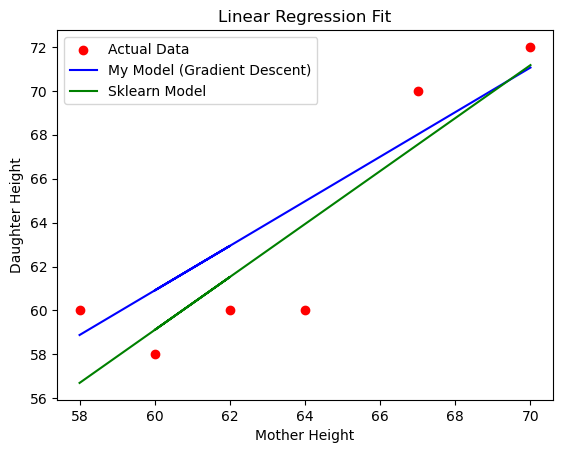

In [153]:
plt.scatter(X, Y, color="red", label="Actual Data")
plt.plot(X, Y_Pred, color="blue", label="My Model (Gradient Descent)")
plt.plot(X, y_pred, color="green", label="Sklearn Model")
plt.legend()
plt.xlabel("Mother Height")
plt.ylabel("Daughter Height")
plt.title("Linear Regression Fit")
plt.show()

### Question 2

In [154]:
df1 = pd.read_csv('study_data.csv')
df1

,Hours,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [155]:
X = df1["Hours "].values
Y = df1["Pass "].values

X = np.array(X)
Y = np.array(Y)

In [156]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(y_true, y_pred):
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)

In [157]:
b1 = 0
b0 = 0
L = 0.01
log = []
for _ in range(100):
    errors = sigmoid(b0 + b1 * X) - Y
    b0 -= L * np.sum(errors) / len(X)
    b1 -= L * np.sum(errors * X) / len(X)
    y_p = sigmoid(b0+b1*X)
    loss = compute_loss(Y, y_p)
    log.append(loss)

Y_pred_sigmoid = sigmoid(b0 + b1 * X)

In [158]:
rmse = root_mean_squared_error(Y, Y_pred_sigmoid)
mse = mean_squared_error(Y, Y_pred_sigmoid)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

RMSE: 0.4510558770397197
MSE: 0.20345140421207075


In [159]:
final = [1 if i > 0.5 else 0 for i in Y_pred_sigmoid]
accuracy = np.mean(final == Y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 50.00%


In [160]:
pred1 = round(sigmoid(b0+b1*3.5))
pred2 = round(sigmoid(b0+b1*7.5))
print(pred1, pred2)

1 1


In [161]:
model = LogisticRegression()
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
model.fit(X, Y)
y_pred = model.predict(X)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
print("sklearn=", model.coef_[0][0], model.intercept_[0])
print("self=", b1, b0)

sklearn= 1.1697993675705605 -5.264107913297968
self= 0.19189134519589263 -0.14142270761996786


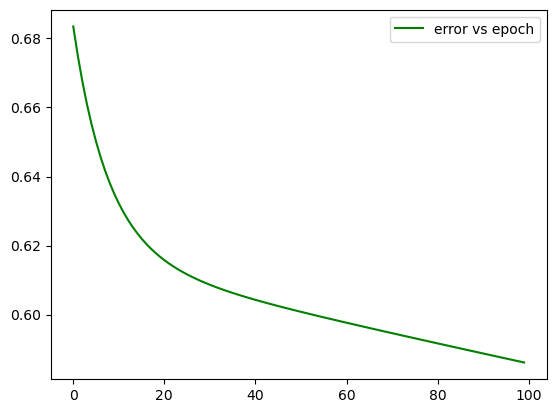

In [163]:
plt.plot(range(100), log, color="green", label="error vs epoch")
plt.legend()
plt.show()

### Question 3

In [164]:
file = pd.read_csv("features.csv")
file

,x1,x2,y
0,4,1,2
1,2,8,-14
2,1,0,1
3,3,2,-1
4,1,4,-7
5,6,7,-8


In [165]:
X1 = file["x1"]
X2 = file[" x2"]
Y = file[" y"]
X2 = np.array(X2)
X1 = np.array(X1)
Y = np.array(Y)
Y = np.array([1 if i > 0 else 0 for i in Y])

In [166]:
b1 = 0
b2 = 0
b0 = 0
L = 0.01
log = []
for _ in range(1000):
    errors = sigmoid(b0 + b1 * X1 + b2 * X2) - Y
    b0 -= L * np.sum(errors) / len(X1)
    b1 -= L * np.sum(errors * X1) / len(X1)
    b2 -= L * np.sum(errors * X2) / len(X2)
    y_p = sigmoid(b0+b1*X1+b2*X2)
    loss = compute_loss(Y, y_p)
    log.append(loss)

Y_pred_sigmoid = sigmoid(b0 + b1 * X1 + b2 * X2)
print(b0, b1, b2)

0.3892026246576094 0.6064264963109737 -1.4956509693830584


In [167]:
rmse = root_mean_squared_error(Y, Y_pred_sigmoid)
mse = mean_squared_error(Y, Y_pred_sigmoid)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

RMSE: 0.1896283214828599
MSE: 0.03595890030840687


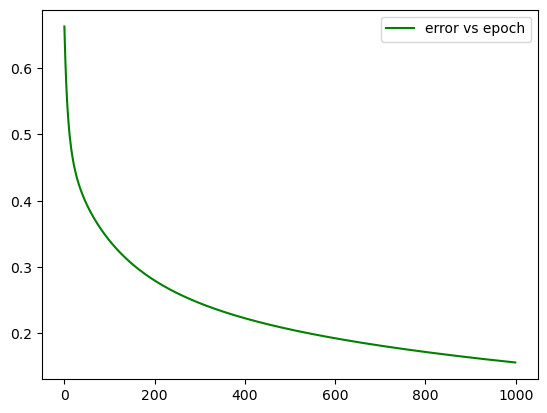

In [168]:
plt.plot(range(1000), log, color="green", label="error vs epoch")
plt.legend()
plt.show()

In [169]:
final = [1 if i > 0.5 else 0 for i in Y_pred_sigmoid]
accuracy = np.mean(final == Y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%
